In [1]:
import tensorflow as tf
from keras import layers, models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import GlobalAveragePooling2D, GlobalMaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2

(x_train, y_train), (x_test, y_test) = mnist.load_data()
def preprocess_images(images, target_size=(28, 28)):
    # Add a channel dimension if needed (for grayscale images)
    images = images[..., tf.newaxis]

    # Resize images
    images_resized = tf.image.resize(images, target_size)

    # Normalize the images
    images_normalized = images_resized / 255.0

    return images_normalized.numpy()

# Resize and preprocess the images
x_train_preprocessed = preprocess_images(x_train)
x_test_preprocessed = preprocess_images(x_test)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

def train_model(model, x_train_preprocessed, y_train, epochs=10, optimizer = 'adam'):
    model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(x_train_preprocessed, y_train, epochs=epochs, batch_size=128, validation_split=0.2) # Use x_train_preprocessed here

def test_model(model, x_test_preprocessed, y_test):
    test_loss, test_accuracy = model.evaluate(x_test_preprocessed, y_test) # Use x_test_preprocessed here
    print(f'Test accuracy: {test_accuracy:.4f}')


11490434/11490434 [==============================] - 1s 0us/step


In [2]:
model1 = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),

    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),

    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),

    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),

    Flatten(),

    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    Dense(10, activation='softmax')
])

train_model(model1, x_train_preprocessed, y_train, 10)
test_model(model1, x_test_preprocessed, y_test)

Epoch 1/10
375/375 [==============================] - 15s 14ms/step - loss: 0.3643 - accuracy: 0.8871 - val_loss: 2.9969 - val_accuracy: 0.2258
Epoch 2/10
375/375 [==============================] - 5s 13ms/step - loss: 0.0972 - accuracy: 0.9696 - val_loss: 0.0685 - val_accuracy: 0.9800
Epoch 3/10
375/375 [==============================] - 5s 13ms/step - loss: 0.0743 - accuracy: 0.9774 - val_loss: 0.0319 - val_accuracy: 0.9904
Epoch 4/10
375/375 [==============================] - 4s 12ms/step - loss: 0.0590 - accuracy: 0.9819 - val_loss: 0.0326 - val_accuracy: 0.9904
Epoch 5/10
375/375 [==============================] - 5s 14ms/step - loss: 0.0532 - accuracy: 0.9842 - val_loss: 0.0331 - val_accuracy: 0.9905
Epoch 6/10
375/375 [==============================] - 4s 12ms/step - loss: 0.0481 - accuracy: 0.9850 - val_loss: 0.0344 - val_accuracy: 0.9913
Epoch 7/10
375/375 [==============================] - 6s 15ms/step - loss: 0.0410 - accuracy: 0.9882 - val_loss: 0.0285 - val_accuracy: 0.991

In [3]:
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.Flatten())
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(10, activation='softmax'))

train_model(model2, x_train_preprocessed, y_train, 10, 'rmsprop')
test_model(model2, x_test_preprocessed, y_test)

Epoch 1/10
375/375 [==============================] - 4s 6ms/step - loss: 0.2907 - accuracy: 0.9103 - val_loss: 0.0812 - val_accuracy: 0.9766
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0672 - accuracy: 0.9781 - val_loss: 0.0574 - val_accuracy: 0.9837
Epoch 3/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0442 - accuracy: 0.9858 - val_loss: 0.0475 - val_accuracy: 0.9863
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0331 - accuracy: 0.9894 - val_loss: 0.0420 - val_accuracy: 0.9877
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0258 - accuracy: 0.9919 - val_loss: 0.0402 - val_accuracy: 0.9892
Epoch 6/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0208 - accuracy: 0.9934 - val_loss: 0.0365 - val_accuracy: 0.9893
Epoch 7/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0161 - accuracy: 0.9951 - val_loss: 0.0455 - val_accuracy: 0.9889
Epoch 

In [4]:
model3 = Sequential()

model3.add(Flatten(input_shape=(28, 28, 1)))
model3.add(Dense(units=128, activation='relu'))
model3.add(Dense(units=128, activation='relu'))
model3.add(Dropout(0.25))
model3.add(Dense(units=10, activation='softmax'))

train_model(model3, x_train_preprocessed, y_train, 10)
test_model(model3, x_test_preprocessed, y_test)

Epoch 1/10
375/375 [==============================] - 3s 4ms/step - loss: 0.4179 - accuracy: 0.8745 - val_loss: 0.1766 - val_accuracy: 0.9492
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1663 - accuracy: 0.9506 - val_loss: 0.1241 - val_accuracy: 0.9625
Epoch 3/10
375/375 [==============================] - 1s 4ms/step - loss: 0.1165 - accuracy: 0.9643 - val_loss: 0.1061 - val_accuracy: 0.9694
Epoch 4/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0875 - accuracy: 0.9737 - val_loss: 0.0939 - val_accuracy: 0.9714
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0709 - accuracy: 0.9781 - val_loss: 0.0869 - val_accuracy: 0.9731
Epoch 6/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0573 - accuracy: 0.9821 - val_loss: 0.0907 - val_accuracy: 0.9726
Epoch 7/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0471 - accuracy: 0.9853 - val_loss: 0.0794 - val_accuracy: 0.9772
Epoch 

Mounted at /content/drive


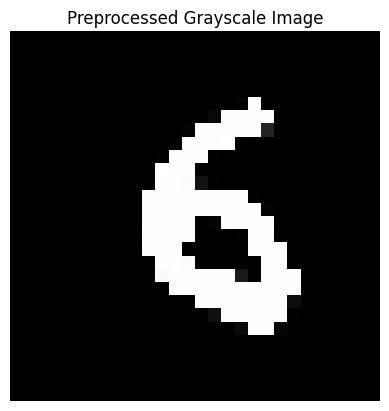

1/1 [==============================] - 0s 75ms/step
Model 1 prediction: 6
Model 2 prediction: 6
Model prediction: 6
The model predicts this image is the digit: 6


In [7]:
from pathlib import PureWindowsPath
import numpy as np
from tensorflow.keras.preprocessing import image
from collections import Counter
from google.colab import drive
import matplotlib.pyplot as plt

def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(28,28), color_mode='grayscale')
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array, img

drive.mount('/content/drive', force_remount=True)
path = '/content/drive/My Drive/image.jpg'
img_path = path

new_test_image, img = preprocess_image(img_path)

# Display the preprocessed image in grayscale
plt.imshow(img, cmap='gray')
plt.axis('off')  # Turn off axis labels
plt.title('Preprocessed Grayscale Image')
plt.show()

import matplotlib.pyplot as plt

prediction1 = model1.predict(new_test_image)
prediction2 = model2.predict(new_test_image)
prediction3 = model3.predict(new_test_image)

predicted_digit1 = np.argmax(prediction1, axis=1)[0]
predicted_digit2 = np.argmax(prediction2, axis=1)[0]
predicted_digit3 = np.argmax(prediction3, axis=1)[0]

print('Model 1 prediction:', predicted_digit1)
print('Model 2 prediction:', predicted_digit2)
print('Model prediction:', predicted_digit3)

votes = [predicted_digit1, predicted_digit2, predicted_digit3]
vote_counts = Counter(votes)
predicted_digit, count = vote_counts.most_common(1)[0]

print(f'The model predicts this image is the digit: {predicted_digit}')